In [97]:
from skimage.filters import gaussian
from skimage import color,io, data, exposure
## 
import matplotlib.pyplot as plt
#import cv2

from skimage.exposure import histogram
from skimage.filters import gaussian
from skimage.filters import threshold_otsu, threshold_local, threshold_li, threshold_minimum
## PIllow
from PIL import Image
import matplotlib.image as mpimg

my_data = 'M109_M111_014.jpg'


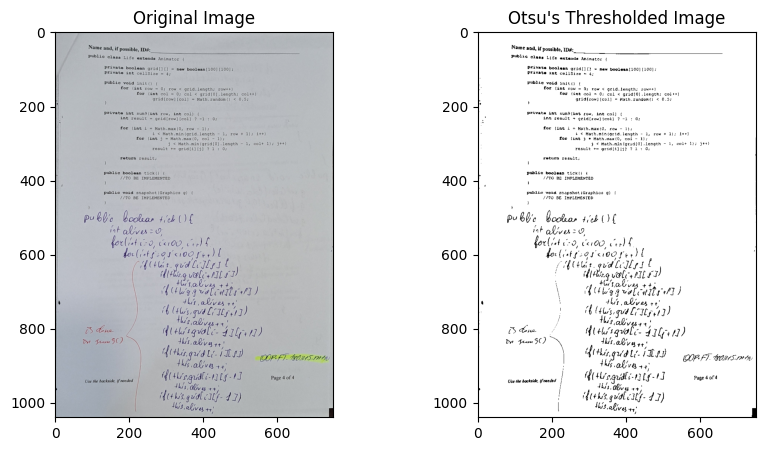

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the image
image_path = 'M109_M111_014.jpg'
image = Image.open(image_path)
image = image.rotate(90, expand=True)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Apply Otsu's thresholding
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Display the original and thresholded images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu's Thresholded Image")

plt.savefig('otsu.png')

plt.show()


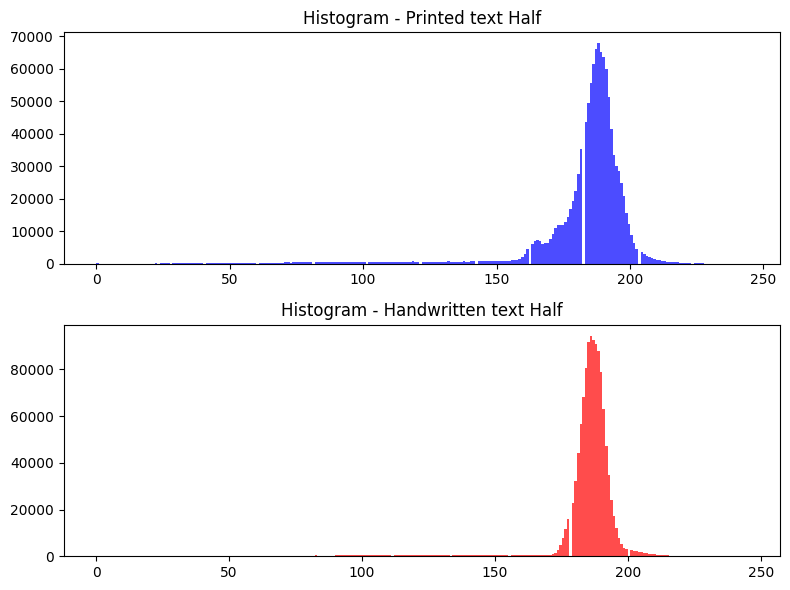

In [95]:
# Open the image
image_path = "M109_M111_014.jpg"  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to a numpy array
image_array = np.array(image)
width, height = image.size

# Split the image into upper and lower halves
upper_half = image_array[:height // 2, :, :]
lower_half = image_array[height // 2:, :, :]

# Plot histograms of each half in the same plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot histogram for upper half
ax1.hist(upper_half.ravel(), bins=256, color='blue', alpha=0.7)
ax1.set_title('Histogram - Printed text Half')

# Plot histogram for lower half
ax2.hist(lower_half.ravel(), bins=256, color='red', alpha=0.7)
ax2.set_title('Histogram - Handwritten text Half')

plt.tight_layout()

plt.savefig('printed-handwritten.jpg')

plt.show()


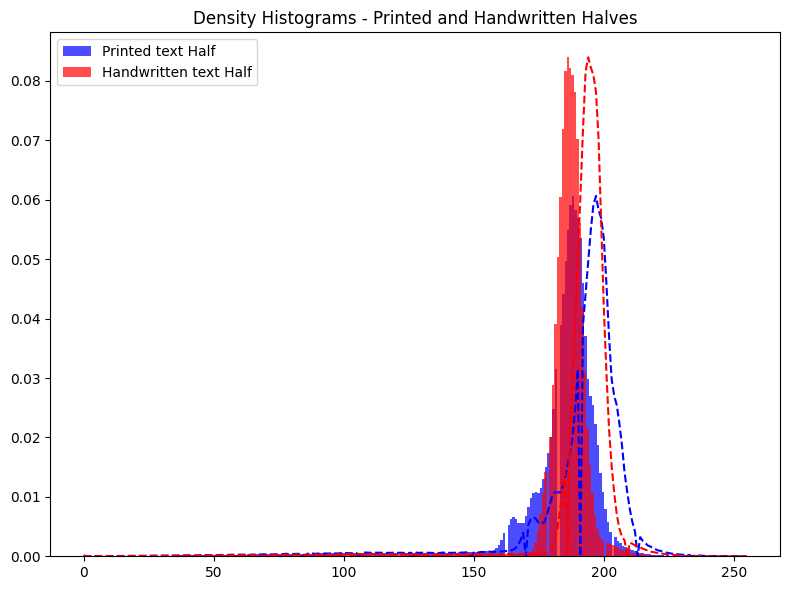

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot density histogram for upper half
ax.hist(upper_half.ravel(), bins=256, density=True, color='blue', alpha=0.7, label='Printed text Half')

# Plot density histogram for lower half
ax.hist(lower_half.ravel(), bins=256, density=True, color='red', alpha=0.7, label='Handwritten text Half')

# Add density lines
ax.plot(np.linspace(0, 255, 256), np.histogram(upper_half.ravel(), bins=256, density=True)[0], color='blue', linestyle='--')
ax.plot(np.linspace(0, 255, 256), np.histogram(lower_half.ravel(), bins=256, density=True)[0], color='red', linestyle='--')

ax.set_title('Density Histograms - Printed and Handwritten Halves')
ax.legend()

plt.tight_layout()

plt.savefig('histograms.jpg')
plt.show()

binary image size =  (1040, 752)
<class 'numpy.ndarray'>


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

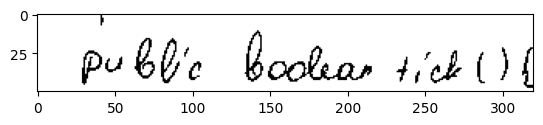

In [99]:
print("binary image size = ",binary_image.shape)
print(type(binary_image))

### examining public boolean tick
crop = binary_image[470:520, 50:370]
# Convert True/False to 1/0
crop_numeric = crop.astype(np.uint8) * 255
plt.imshow(crop_numeric, cmap='gray')

mpimg.imsave('crop.png', crop_numeric, cmap='gray')


crop_numeric

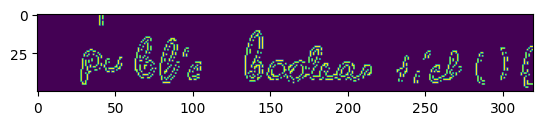

In [100]:
image = np.array(image)
color_crop = image[470:520, 50:370]
#plt.imshow(color_crop)
#gray = cv2.cvtColor(color_crop, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(crop_numeric, 50, 150, apertureSize=3)
# Display the edges
plt.imshow(edges)
mpimg.imsave('crop.png', edges)


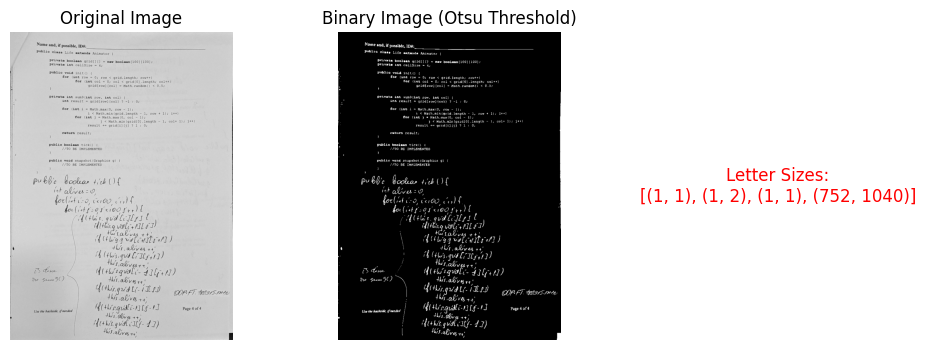

In [101]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image_path = "M109_M111_014.jpg"  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Otsu thresholding
_, binary_image = cv2.threshold(original_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the bounding box of each contour
bounding_boxes = [cv2.boundingRect(contour) for contour in contours]

# Extract width and height of each bounding box
letter_sizes = [(box[2], box[3]) for box in bounding_boxes]

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='binary')
axes[1].set_title('Binary Image (Otsu Threshold)')
axes[1].axis('off')

axes[2].text(0.5, 0.5, f'Letter Sizes:\n{letter_sizes}',
            ha='center', va='center', fontsize=12, color='red')
axes[2].axis('off')

plt.savefig("sizes.jpg")
plt.show()


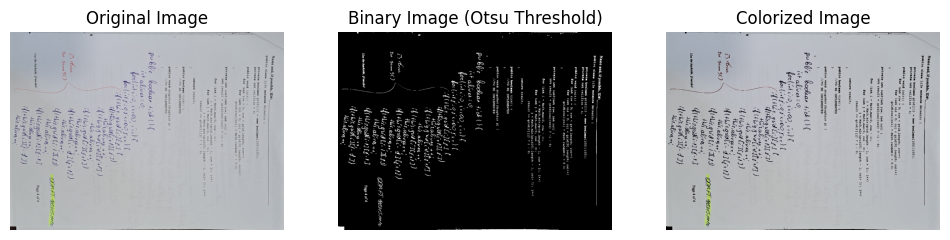

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

# Load the input image
image_path = "M109_M111_014.jpg"  # Replace with the actual path to your image
original_image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(original_image)

# Apply Otsu thresholding
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

# Create a colorized image from the binary image
colorized_image = np.zeros_like(original_image)
colorized_image[binary_image] = original_image[binary_image]

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_image, cmap='binary')
axes[1].set_title('Binary Image (Otsu Threshold)')
axes[1].axis('off')

axes[2].imshow(colorized_image)
axes[2].set_title('Colorized Image')
axes[2].axis('off')
output_path = "colorized_text.jpg"
io.imsave(output_path, colorized_image)


plt.show()
